# Chapter 6. 확률

### 6.2 조건부 확률

In [3]:

import enum, random # Enum을 사용하면 각 항목에 특정 값을 부여할 수 있으며, 파이썬 코드를 깔끔하게 만들어줌

class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid() -> Kid:
    
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1


print("P(both | older) : ", both_girls / older_girl)
print("P(both | either) : ", both_girls / either_girl)
# 아들 한 명일 확률, 두 명 모두 딸일 확률보다 두 배 높음.

P(both | older) :  0.5007089325501317
P(both | either) :  0.3311897106109325


### 6.5 연속 분포

In [4]:
# 균등 분포 확률 밀도 함수 : 연속형 분포에서 가장 단순한 분포형태로 특정구간 내의 값들이 나타날 가능성
# 연속형 확률변수 X가 실수구간 [a, b] 에서 나타날 가능성이 균등할 때, X는 균등분포를 따른다고 하며 X~U(a, b)로 표현함
# random.random() 균등 분포를 따르는 확률변수

def uniform_pdf(x):
    
    return 1 if x >= 0 and x < 1 else 0

In [5]:
def uniform_cdf(x): # 균등 분포를 따르는 확률변수의 값이 x보다 작거나 같은 확률 반환
    if x < 0:   
        return 0    # 균등 분포의 확률은 0보다 작을 수 없음.
        
    elif x < 1: 
        return x    # ex) P(X <= 0.4) = 0.4

    else:       
        return 1    # 균등 분포의 확률은 항상 1보다 작음.

### 6.6 정규분포

In [6]:
# 정규분포 : 평균(뮤)와 표준편차(시그마)의 두 파라미터로 정의 됨
# 평균 - 종의 중심이 어디인지 나타냄, 표준편차 - 종의 폭이 얼마나 넓은지 나타냄

import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x : float, mu : float = 0, sigma : float = 1) -> float:
    
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

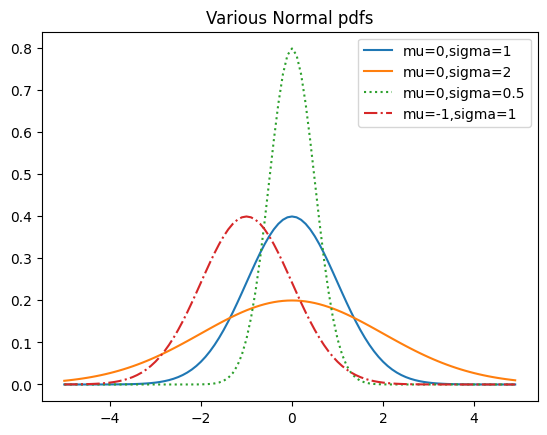

In [8]:
import matplotlib.pyplot as plt

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'-',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show() 

# 표준정규분포 : 뮤 = 0, 시그마 = 1인 정규분포

In [10]:
# 정규 분포의 누적 분포 함수
def normal_cdf(x : float, mu : float = 0,sigma : float = 1) -> float:
    
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

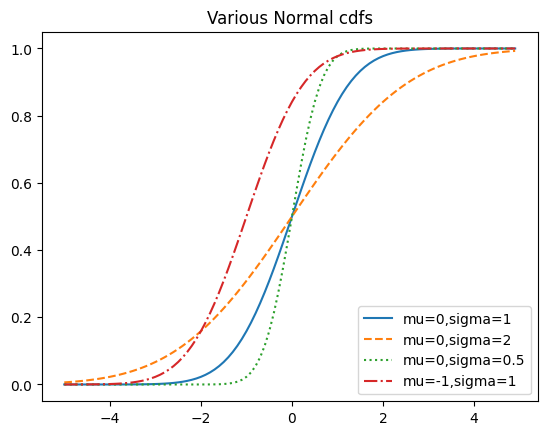

In [12]:

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

In [ ]:
def inverse_normal_cdf(p : float, mu : float =0, sigma : float =1, tolerance : float =0.00001) -> float: # 이진 검색 사용해 역함수를 근사

    # 표준정규분포가 아니면 표준정규분포로 변환
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0            # normal_cdf(-10)은 0에 근접
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)은 1에 근접
    while hi_z - low_z > tolerance :
        mid_z = (low_z + hi_z) / 2     # 중간 값
        mid_p = normal_cdf(mid_z)      # 중간 값의 누적분포 계산
        if mid_p < p :
            low_z, low_p = mid_z, mid_p # 중간 값이 너무 작다면 더 큰 값을 검색
        else : 
            mid_p > p: # 중간 값이 너무 크다면 더 작은 값을 검색

    return mid_z

    # 원하는 확률 값에 가까워질 때까지 표준정규분포의 구간을 반복적으로 이등분 함.

### 6.7 중심국한정리 : 동일한 분포에 대한 독립적인 확률변수의 평균을 나타내는 확률변수가 대략적으로 정규분포를 따른다는 정리

In [13]:
# 베르누이 확률변수 : 베르누이 시행의 결과를 실수 0 또는 1로 바꾼 것, 베르누이 확률변수는 두 값 중 하나만 가질 수 있으므로 이산확률변수(discrete random variable)임.

def bernoulli_trial(p): # p의 확률롤 1을, 1-p의 확률로 0 을 반환
    
    return 1 if random.random() < p else 0

In [20]:
def binomial(p, n): # n개 bernoulli(p)의 합 반환
    
    return sum(bernoulli_trial(p) for _ in range(n))

In [21]:
from collections import Counter
    
def binomial_histogram(p : float, n : int, num_points : int) -> None: # binomial(n,p)의 결과값을 히스토그램으로 표현
    data = [binomial(p, n) for _ in range(num_points)]
    
    # 이항분포의 표본을 막대 그래프로 표현
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # 근사된 전규분포를 라이 차트로 표현
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs,ys)
    plt.show()

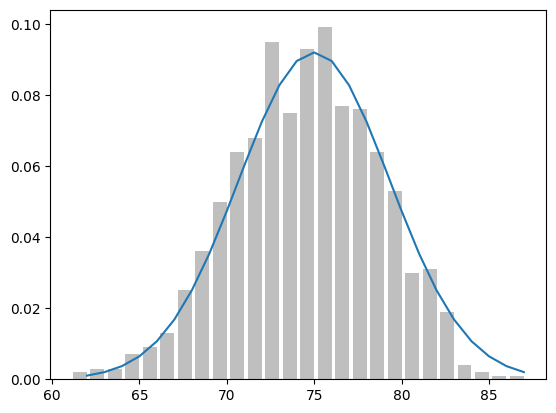

In [22]:
binomial_histogram(0.75,100,1000)

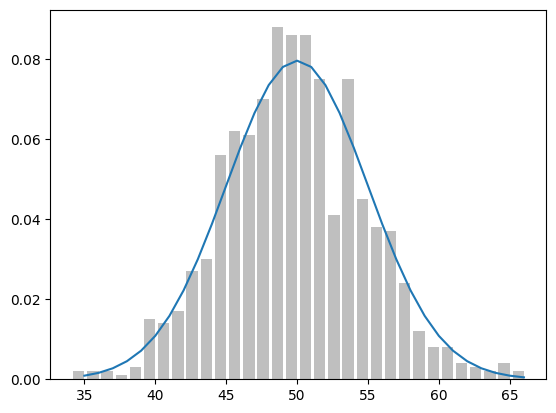

In [23]:
binomial_histogram(0.50,100,1000)